# Salary Prediction 

# EDA

## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

## Obtain data

In [ ]:
train_salaries = pd.read_csv("https://raw.githubusercontent.com/min-tee/Salary-Prediction/main/datasets/train_salaries.csv")
train_features = pd.read_csv("https://raw.githubusercontent.com/min-tee/Salary-Prediction/main/datasets/train_features.zip")
test_features = pd.read_csv("https://raw.githubusercontent.com/min-tee/Salary-Prediction/main/datasets/test_features.zip")

## Clean data

In [ ]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [ ]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [ ]:
# merge features and targets on jobID
train_dataset = pd.merge(train_features, train_salaries, on = 'jobId')
train_dataset.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [ ]:
# dimension of data set
train_dataset.shape

(1000000, 9)

In [ ]:
# see if there are any missing values
train_dataset.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [ ]:
# confirmation check for any missing or null values
train_dataset.isnull().values.any()

False

In [ ]:
# see records and data types
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [ ]:
# check for duplicates
train_dataset.duplicated().sum()

0

In [ ]:
test_features.duplicated().sum()

0

In [ ]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [ ]:
test_features.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## Explore data

**Summarize the dataset**

In [ ]:
train_dataset.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [ ]:
train_dataset.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685350252,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


**Check distribution of target variable**

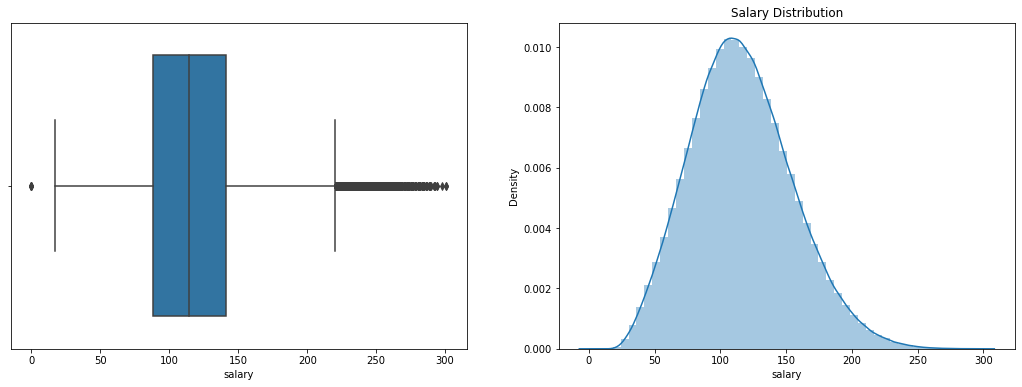

In [ ]:
# set up the matplotlib figure and plot distribution 
f, axes = plt.subplots(ncols=2, figsize = (18,6))
sns.boxplot(train_dataset.salary, ax = axes[0])
sns.distplot(train_dataset['salary'], ax = axes[1])
plt.savefig("salary_dist.png")
plt.title("Salary Distribution")
plt.show()


**Detect outliers**

In [ ]:
# identify potential outliers using IQR
q1, q3= train_dataset.salary.quantile([0.25, 0.75])
iqr = q3-q1
upper = q3 + 1.5 * iqr 
lower = q1 - 1.5 * iqr 
print('The upper & lower bounds for potential outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for potential outliers are 220.5 and 8.5.


In [ ]:
# check outliers below lower bound
train_dataset[train_dataset.salary <8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [ ]:
# check above upper bound salaries
train_dataset[train_dataset.salary>220.5].head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
966,JOB1362684408653,COMP32,CEO,DOCTORAL,ENGINEERING,FINANCE,23,11,247
986,JOB1362684408673,COMP37,CFO,HIGH_SCHOOL,NONE,FINANCE,24,20,229
1211,JOB1362684408898,COMP24,CTO,DOCTORAL,BUSINESS,FINANCE,5,46,232
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
1413,JOB1362684409100,COMP56,VICE_PRESIDENT,MASTERS,MATH,WEB,24,15,241


In [ ]:
# examine further above upper bound salaries
train_dataset.loc[train_dataset.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [ ]:
# are junior job type salaries outliers for real?
train_dataset.loc[(train_dataset.salary>220.5) & (train_dataset.jobType == 'JUNIOR'), 'industry'].value_counts()

OIL        11
FINANCE     8
WEB         1
Name: industry, dtype: int64

Records with zero salaries  will be removed as it appears that these are instances of missing or corrupt data. 
However, the higher salary above upper bound seem to be legitimate data. Most roles are executive level and from the industry that pays more. 

In [ ]:
# remove zero salary recods
train_dataset = train_dataset[train_dataset.salary>8.5]

**Visually explore explanatory variable's relation with target variable**

In [ ]:
# create function to visually explore relationships between salary and independent variables
def explore_feature(df,col):
    plt.figure (figsize = (18,8))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64' or col =='companyId':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values+std.values, \
                        alpha =0.1)
        plt.ylabel('Salaries')
    else :
        col_mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = col_mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        col_mean.sort_values().plot(kind='bar')
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel('Average salary by'+ ' ' + col)
        plt.subplot(1,2,2)
        sns.boxplot(x=col, y='salary', data=df)
        plt.xticks(rotation=45)    
        plt.ylabel('Salaries') 
    plt.show()

In [ ]:
train_data_features=['jobType', 'degree', 'major', 'industry', 'yearsExperience','milesFromMetropolis', 'companyId']


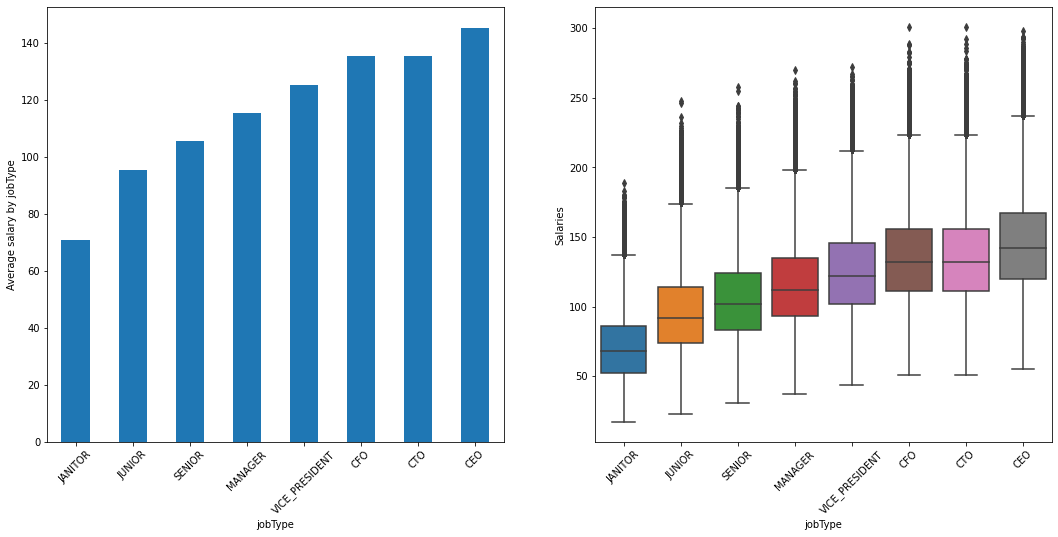

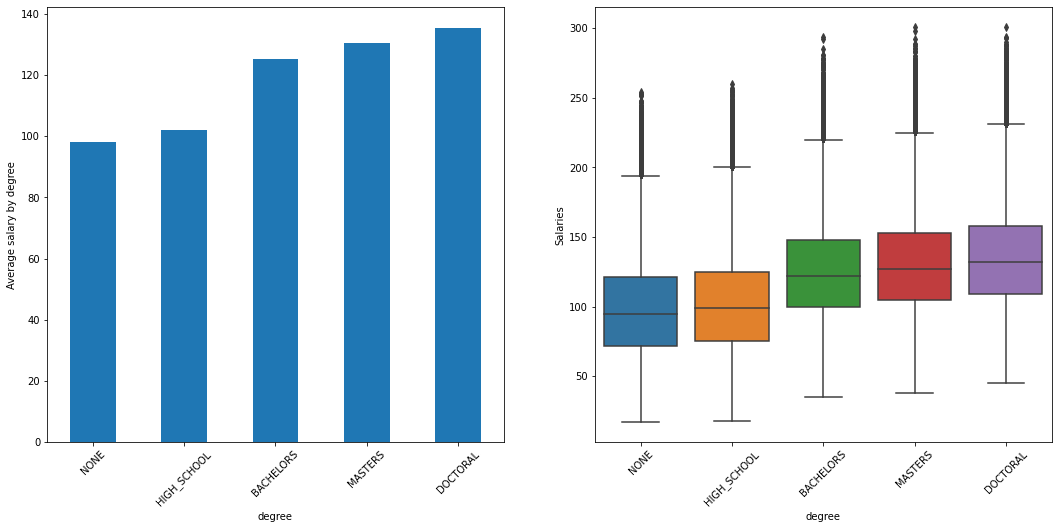

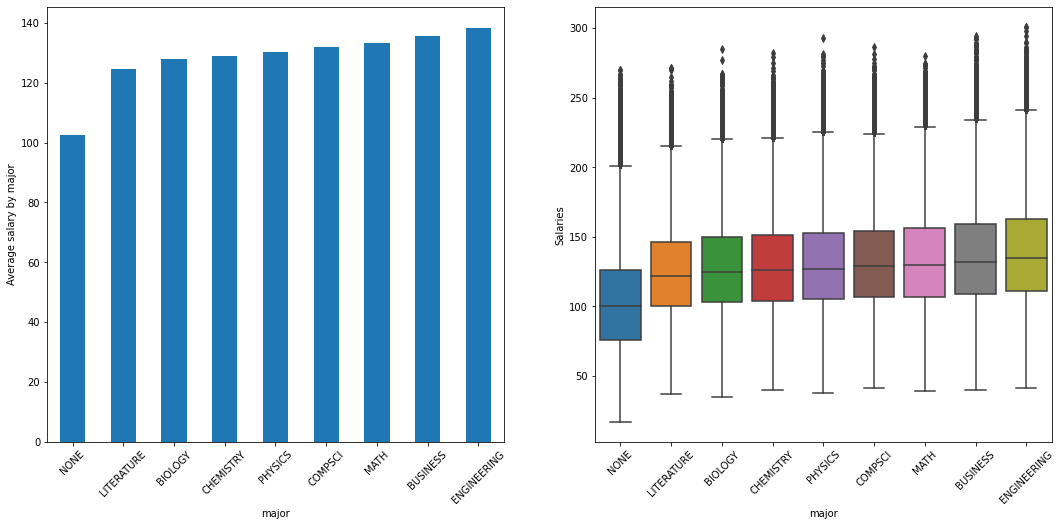

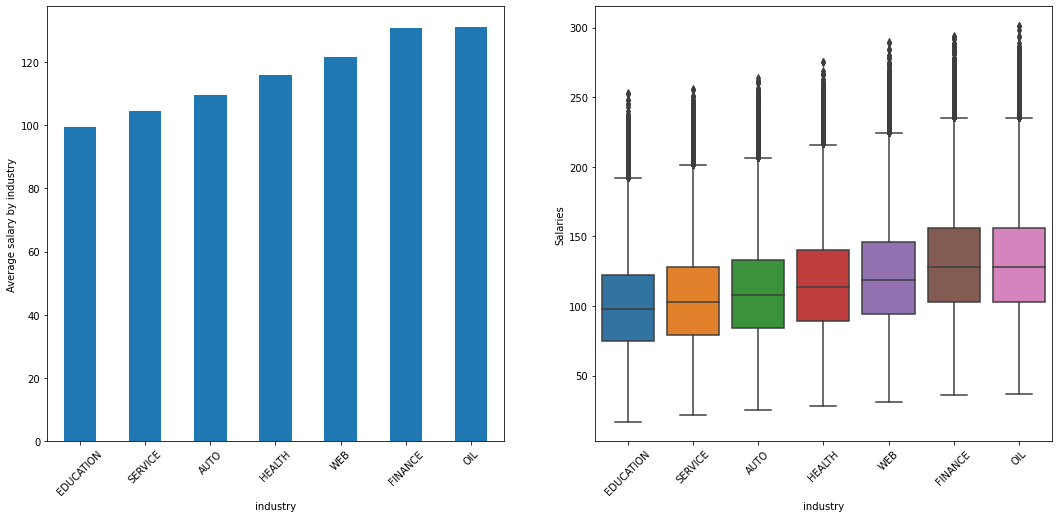

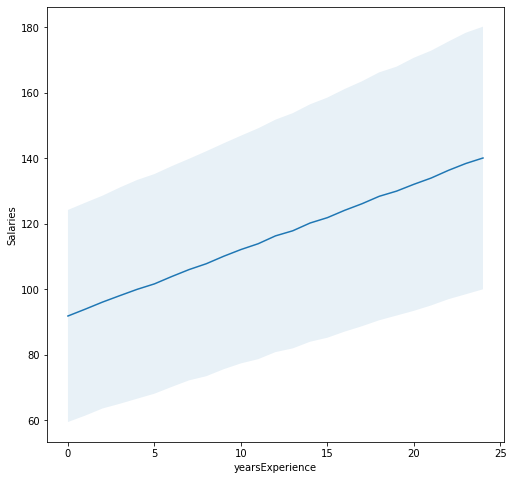

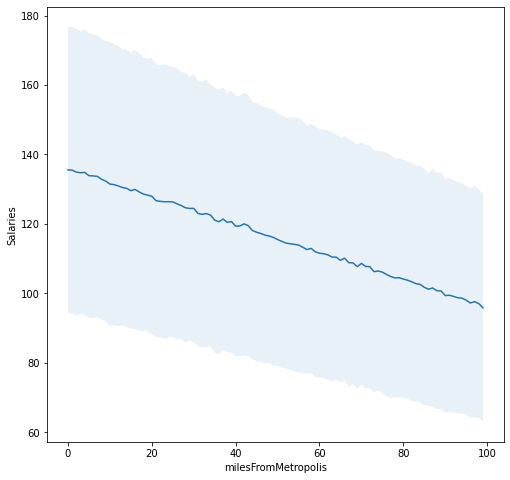

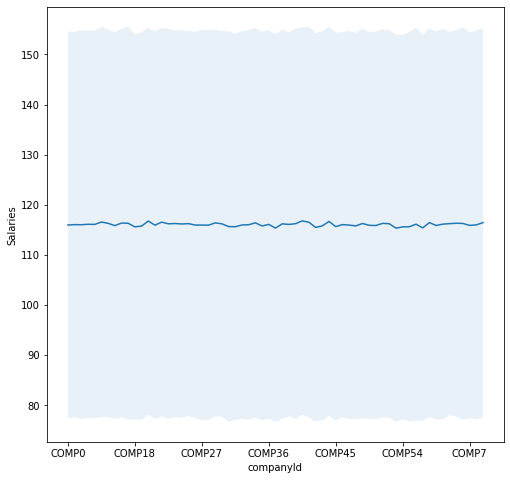

In [ ]:
for features in train_data_features:
    explore_feature(train_dataset, features)

It indicates that  variables -  job type, degree, major, industry, years of experience impact salary positively. Whereas miles from metrolpolis is negatively correlated and company is not correlated. 

**Check for correlation among variables**

In [ ]:
# Label encode categorical variables by mean salary for respective category
def label_encoding(data, column):
    dict = {}
    cat_list = data[column].cat.categories.tolist()
    for cat in cat_list:
        dict[cat] = data[data[column] == cat]['salary'].mean()
    data[column] = data[column].map(dict)

In [ ]:
train_data_copy = train_dataset.copy()
for column in train_data_copy.columns:
    if train_data_copy[column].dtype.name == 'category':
        label_encoding(train_data_copy, column)
        train_data_copy[column] = train_data_copy[column].astype('float')

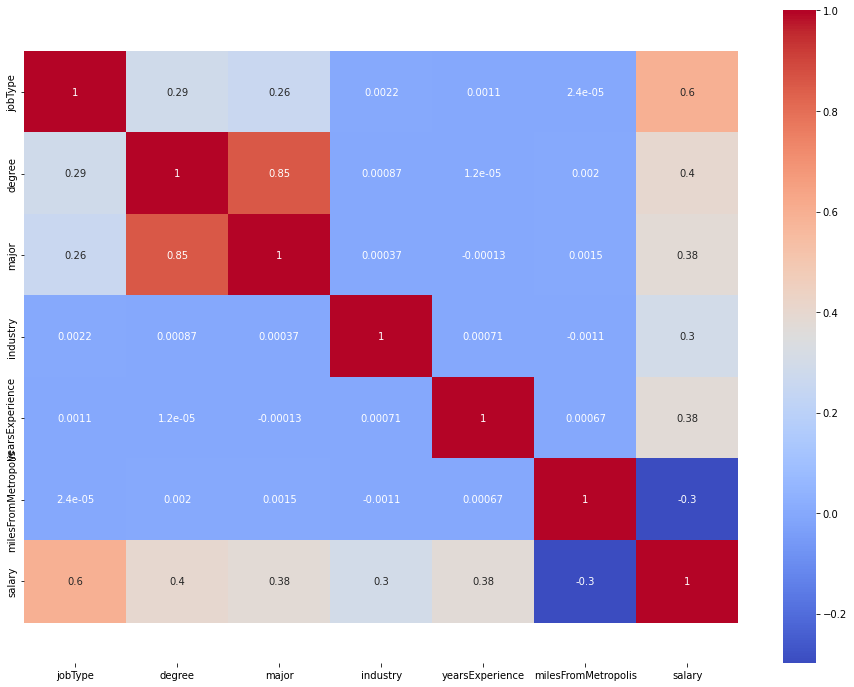

In [ ]:
cm=train_data_copy.corr()
corr_features=cm.index
plt.figure(figsize=(16,12))
ax=sns.heatmap(train_data_copy[corr_features].corr(), annot=True, cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig("correlationmatrix.png")
plt.show()

# Modeling 

In [ ]:
# Import libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import  metrics

**Establish a baseline**

In [ ]:
# baseline model with MSE
baseline_industry = mean_squared_error(train_data_copy['industry'], train_data_copy['salary'])
baseline_industry

1367.122950785255

In [ ]:
baseline_jobtype = mean_squared_error(train_data_copy['jobType'], train_data_copy['salary'])
baseline_jobtype

963.9252996562975

**Feature engineering : One-hot encoding**

In [ ]:
cat_dtype = [ 'jobType', 'degree', 'major', 'industry']
num_dtype = ['yearsExperience', 'milesFromMetropolis', 'salary']
# one-hot encode catergorical varaibles, drop_first to get k-1 dummies minus reference column which will be represented uniquely 
feat_dataset = pd.get_dummies(train_dataset[cat_dtype], drop_first=True) 

In [ ]:
feat_dataset.head()

,jobType_JUNIOR,jobType_SENIOR,jobType_MANAGER,jobType_VICE_PRESIDENT,jobType_CFO,jobType_CTO,jobType_CEO,degree_HIGH_SCHOOL,degree_BACHELORS,degree_MASTERS,degree_DOCTORAL,major_LITERATURE,major_BIOLOGY,major_CHEMISTRY,major_PHYSICS,major_COMPSCI,major_MATH,major_BUSINESS,major_ENGINEERING,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
num_dtype = ['yearsExperience', 'milesFromMetropolis', 'salary']

In [ ]:
num_train_dataset = train_dataset[num_dtype]

In [ ]:
feat_train_dataset = pd.concat([feat_dataset, num_train_dataset], axis = 1)
feat_train_dataset.head()

,jobType_JUNIOR,jobType_SENIOR,jobType_MANAGER,jobType_VICE_PRESIDENT,jobType_CFO,jobType_CTO,jobType_CEO,degree_HIGH_SCHOOL,degree_BACHELORS,degree_MASTERS,degree_DOCTORAL,major_LITERATURE,major_BIOLOGY,major_CHEMISTRY,major_PHYSICS,major_COMPSCI,major_MATH,major_BUSINESS,major_ENGINEERING,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL,yearsExperience,milesFromMetropolis,salary
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,10,83,130
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,73,101
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,10,38,137
3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,8,17,142
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,8,16,163


In [ ]:
# separate out feature engineered dataset into X and y for train test split
X = feat_train_dataset.iloc[:, 0:27]
y = feat_train_dataset.iloc[:, -1]

In [ ]:
 # split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

**Linear Regression**

In [ ]:
lin_regressor = LinearRegression()
reg_model = lin_regressor.fit(X_train, y_train)

In [ ]:
# predicting the test results
lin_pred = reg_model.predict(X_test)

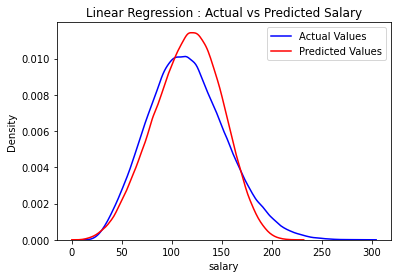

In [ ]:
# y_test vs lin_pred kde plot
sns.kdeplot(y_test, color='blue', label = 'Actual Values')
sns.kdeplot(lin_pred, color='red', label = 'Predicted Values')
plt.title("Linear Regression : Actual vs Predicted Salary")
plt.savefig("lin_reg.png")
plt.legend()
plt.show()

In [ ]:
# R-Squared Error : a goodness of fit measures
lin_r2 = metrics.r2_score(y_test, lin_pred)
lin_r2

0.7444743898928083

In [ ]:
# compute mean squared error(mse)
reg_mse = mean_squared_error(y_test, lin_pred)
print(reg_mse)

384.8298871142759


**Random Forest**

In [ ]:
rf_regressor = RandomForestRegressor( n_estimators=150, max_depth=30,n_jobs=2,max_features=25, verbose=0, min_samples_split=60)
rf_model = rf_regressor.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test,rf_pred)

In [ ]:
rf_mse

370.9013305559878

In [ ]:
rf_r2 = metrics.r2_score(y_test, rf_pred)
rf_r2

0.7537228995113251

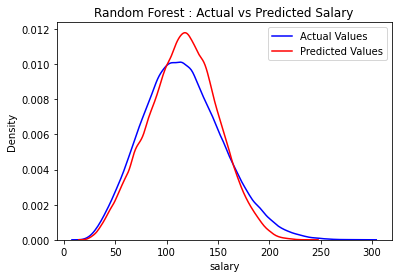

In [ ]:
# y_test vs rf_pred kde plot
sns.kdeplot(y_test, color='blue', label = 'Actual Values')
sns.kdeplot(rf_pred, color='red', label = 'Predicted Values')
plt.title("Random Forest : Actual vs Predicted Salary")
plt.savefig("rf_reg.png")
plt.legend()
plt.show()

**Gradient Boosting**

In [ ]:
gb_reg = GradientBoostingRegressor( n_estimators=150, max_depth=8, loss='ls', verbose=0)
gb_model = gb_reg.fit(X_train,y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mse

359.2901724572622

In [ ]:
gb_r2 = metrics.r2_score(y_test, gb_pred)
gb_r2

0.7614326651937053

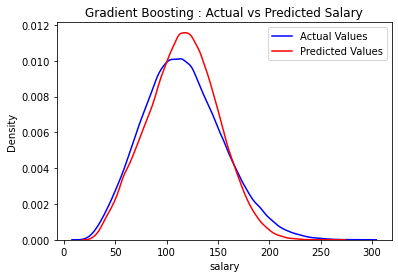

In [ ]:
# y_test vs gb_pred kde plot
sns.kdeplot(y_test, color='blue', label = 'Actual Values')
sns.kdeplot(gb_pred, color='red', label = 'Predicted Values')
plt.title("Gradient Boosting : Actual vs Predicted Salary")
plt.savefig("gb_reg.png")
plt.legend()
plt.show()

**Apply 5-fold cross validations on models and check MSE**

In [ ]:
reg_cv_mse=-1 *np.mean(cross_val_score(lin_regressor, X_test, y_test, cv = 5, scoring="neg_mean_squared_error" ))
reg_cv_mse

384.93352565712246

In [ ]:
rf_cv_mse = -1*np.mean(cross_val_score(rf_regressor, X_test, y_test, cv=5, scoring ="neg_mean_squared_error"))
rf_cv_mse

390.0169302477892

In [ ]:
gb_cv_mse = -1*np.mean(cross_val_score(gb_reg, X_test, y_test, cv=5, scoring = "neg_mean_squared_error"))
gb_cv_mse

367.85545134312406

**Select the best model**

In [ ]:
model_mse_r2 = {
    'Linear Regression' : [round(reg_mse,2),round(reg_cv_mse,2), round(lin_r2,2)],
    'Random Forest' : [round(rf_mse,2),round(rf_cv_mse,2),round(rf_r2,2)],
    'Gradient Boosting' : [round(gb_mse,2),round(gb_cv_mse,2), round(gb_r2,2)]
}
mse_r2_df = pd.DataFrame(model_mse_r2, index=['Without CV', 'With CV', 'R-Squared'])
mse_r2_df

,Linear Regression,Random Forest,Gradient Boosting
Without CV,384.83,370.90,359.29
With CV,384.93,390.02,367.86
R-Squared,0.74,0.75,0.76


<Figure size 432x288 with 0 Axes>

The best model is Gradient Boosting Regressor based on mean squared error and r-squared value. 

# Deploy

**Use Gradient Boosting Regressor on test set**

In [ ]:
# prepare test set for prediction
cat_test = [ 'jobType', 'degree', 'major', 'industry']
num_test = ['yearsExperience', 'milesFromMetropolis']
# one-hot encode catergorical varaibles, drop_first to get k-1 dummies minus reference column which will be represented uniquely 
onehot_test = pd.get_dummies(test_features[cat_test], drop_first=True) 
num_test_dataset = test_features[num_test]
feat_test_dataset = pd.concat([onehot_test, num_test_dataset], axis = 1)
feat_test_dataset.head()


,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,22,73
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,20,47
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,17,9
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,14,96
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10,44


**Predict Salaries**

In [ ]:
# Make prediction and match with Job ID
pred_test = gb_model.predict(feat_test_dataset)
pred_salaries = pd.DataFrame(pred_test, columns=['Predicted Salaries'])
pred_salaries_withID = pd.concat([test_features['jobId'], pred_salaries], axis = 1)
# save predicted salaries in csv
pred_salaries_withID.to_csv("predicted_salary.csv", index= False)
pred_salaries_withID.head()


,jobId,Predicted Salaries
0,JOB1362685407687,143.616818
1,JOB1362685407688,136.165907
2,JOB1362685407689,138.483950
3,JOB1362685407690,123.974814
4,JOB1362685407691,120.640703


**Feature Importance**

In [ ]:
# create object using the best selected model
feat_importance =pd.DataFrame({'Features':feat_test_dataset.columns, 'Importance':gb_model.feature_importances_})

In [ ]:
feat_importance.sort_values(by='Importance', ascending=False, inplace=True)

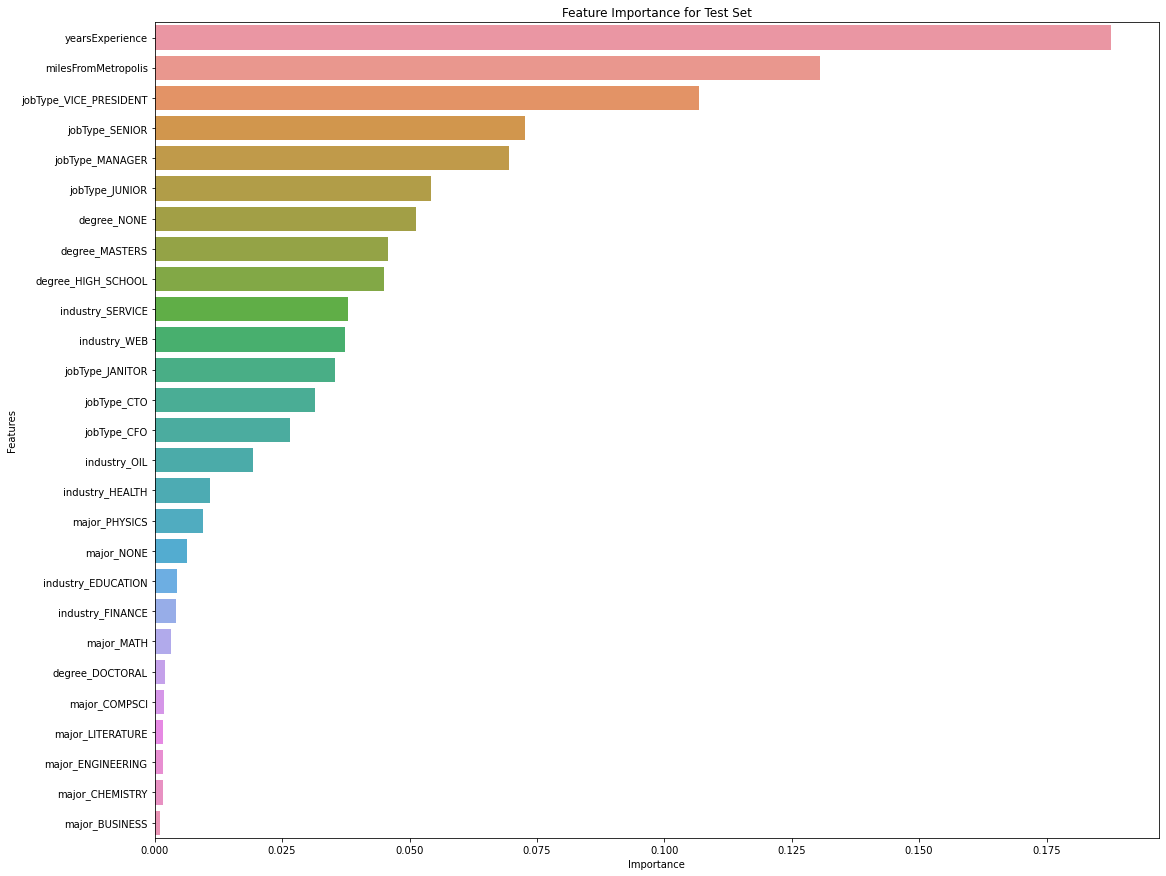

In [ ]:
plt.figure(figsize=(18,15))
sns.barplot(x='Importance', y='Features', data=feat_importance)
plt.title("Feature Importance for Test Set")
plt.savefig("feature_importance.png")
plt.show()